# K-Means Clustering and Visualizing It

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\chand\AppData\Local\Temp\ipykernel_38908\2046667253.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv("C:\\Users\\chand\\Documents\\Git Repos\\AIML-1\\StatsDatasets\\pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [6]:
#Get data for 3 types only 
type1_mask = df['Type 1'].isin(["Grass","Fire","Water"])
type1_mask2 =df['Type 1'].isin(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'])

#remove unneeded columns  - we want the clustering algo to classify the data based on numerical measure only 
drop_cols = ['#',"Type 1","Type 2","Generation","Legendary"]



In [28]:
#preserve the original dataframe 
df_org = df.copy()

In [32]:
#apply filter and drop cols
df = df[type1_mask].drop(columns=drop_cols,axis=1)
df.shape

(234, 12)

Objective: 
- build three clusters based on Attack and Defense
- Derive the centroids of the three clusters 
- add centroid and cluster info to the dataframe 
- plot the clusters 
- 

In [9]:
km = KMeans(n_clusters=3,random_state=30)


In [10]:
#apply kmeans on two columns, but it is recommended to apply it on multiple columns to get better clustering. ONly doing two for visualization purposes. 
    #sometimes a client will specify which attributes/features to use for clustering based on their problem statement 
df["cluster"] = km.fit_predict(df[['Attack','Defense']]) #giving clusters based on attack and defense 
df.head() #new column added for cluster


,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster
0,Bulbasaur,318,45,49,49,65,65,45,0
1,Ivysaur,405,60,62,63,80,80,60,0
2,Venusaur,525,80,82,83,100,100,80,2
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1
4,Charmander,309,39,52,43,60,50,65,0


In [11]:
#define the centroids - we expect 3 centroids 
centroids = km.cluster_centers_
print(centroids) #we get 6 values because they are coordinates based on x1 and x2 

print()
print(centroids[0])

[[ 49.875       48.075     ]
 [112.27083333 102.47916667]
 [ 79.80188679  74.38679245]]

[49.875 48.075]


In [12]:
cent_x = [i[0] for i in centroids] #gives every results in the x coordinates 
cent_y = [i[1] for i in centroids] #gives every results in the x coordinates 
print(cent_x)
print(cent_y)


[49.874999999999964, 112.27083333333329, 79.80188679245283]
[48.074999999999974, 102.47916666666664, 74.38679245283018]


In [13]:
#map the centroid to the cluster in the dataset based on index positions 
df['centx'] = df['cluster'].map({
    0:cent_x[0],
    1:cent_x[1],
    2:cent_x[2]
})

df['centy'] = df['cluster'].map({
    0:cent_y[0],
    1:cent_y[1],
    2:cent_y[2]
})

df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,centx,centy
0,Bulbasaur,318,45,49,49,65,65,45,0,49.875000,48.075000
1,Ivysaur,405,60,62,63,80,80,60,0,49.875000,48.075000
2,Venusaur,525,80,82,83,100,100,80,2,79.801887,74.386792
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,112.270833,102.479167
4,Charmander,309,39,52,43,60,50,65,0,49.875000,48.075000


In [14]:
#optional assign each cluster with a custom cluster and add to dataset
my_cust_col = ['#E4080A','#FFDE59','#0E05FC']

df['clust_col'] = df['cluster'].map({
    0:my_cust_col[0],
    1:my_cust_col[1],
    2:my_cust_col[2]
})

df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,centx,centy,clust_col
0,Bulbasaur,318,45,49,49,65,65,45,0,49.875000,48.075000,#E4080A
1,Ivysaur,405,60,62,63,80,80,60,0,49.875000,48.075000,#E4080A
2,Venusaur,525,80,82,83,100,100,80,2,79.801887,74.386792,#0E05FC
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,112.270833,102.479167,#FFDE59
4,Charmander,309,39,52,43,60,50,65,0,49.875000,48.075000,#E4080A


Plotting

Text(0, 0.5, 'Defense')

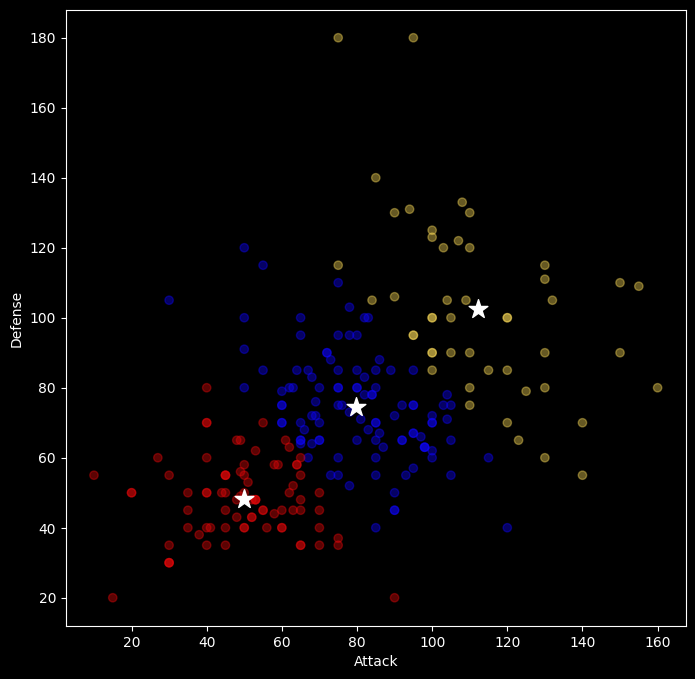

In [15]:
plt.style.use('dark_background')
plt.figure(figsize=(8,8))
plt.scatter(df['Attack'],df['Defense'],c=df['clust_col'],alpha=0.4) #alpha controls transparency to see overlap 
plt.scatter(cent_x,cent_y,marker='*',s=200,c='white')
plt.xlabel('Attack')
plt.ylabel('Defense')

In [ ]:
#adding lines 
from matplotlib.lines import Line2D

fig,ax = plt.subplots(1, figsize=(8,8))

plt.scatter(df['Attack'],df['Defense'],c=df['clust_col'],alpha=0.4) #alpha controls transparency to see overlap 
plt.scatter(cent_x,cent_y,marker='*',s=200,c='white')

for idx, val in df.iterrows(): 
    x=

In [42]:
df.groupby(['cluster'])[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].agg(['mean','min','max'])

Total                   HP               Attack           \
               mean  min  max       mean min  max        mean min  max   
cluster                                                                  
0        322.600000  180  525  53.062500  20  130   49.875000  10   90   
1        557.208333  325  770  83.395833  30  115  112.270833  75  160   
2        461.858491  305  634  77.047170  30  170   79.801887  30  120   

            Defense  ...         Sp. Atk             Sp. Def           \
               mean  ...  max       mean min  max       mean min  max   
cluster              ...                                                
0         48.075000  ...   80  58.087500  10  110  55.700000  20  140   
1        102.479167  ...  180  98.645833  25  180  87.687500  25  160   
2         74.386792  ...  120  85.367925  15  159  74.698113  25  129   

             Speed           
              mean min  max  
cluster                      
0        57.800000  15  110  
1        72.729167  20  145  
2        70.556604  10  127  

[3 rows x 21 columns]

# homework 
- add the previously dropped col (type 1) to the df and compare the outcome to the different clusters 

In [23]:
type1_mask2 =df_org['Type 1'].isin(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'])

#remove unneeded columns  - we want the clustering algo to classify the data based on numerical measure only 
drop_cols = ['#',"Type 1","Type 2","Generation","Legendary"]


In [25]:
#apply filter and drop cols
df2 = df_org[type1_mask2].drop(columns=drop_cols,axis=1)
df2.head()
df2.shape


(800, 8)

In [30]:
km = KMeans(n_clusters=3,random_state=30)
df2["cluster"] = km.fit_predict(df2[['Attack','Defense']]) #giving clusters based on attack and defense 
df2.head() #new column added for cluster

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster
0,Bulbasaur,318,45,49,49,65,65,45,1
1,Ivysaur,405,60,62,63,80,80,60,1
2,Venusaur,525,80,82,83,100,100,80,2
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,2
4,Charmander,309,39,52,43,60,50,65,1


In [34]:
#define the centroids - we expect 3 centroids 
centroids = km.cluster_centers_
print(centroids) #we get 6 values because they are coordinates based on x1 and x2 


[[118.70135747  83.91402715]
 [ 58.6766055   54.77293578]
 [ 79.61538462 116.41958042]]


In [35]:
cent_x = [i[0] for i in centroids] #gives every results in the x coordinates 
cent_y = [i[1] for i in centroids] #gives every results in the x coordinates 
print(cent_x)
print(cent_y)

[118.70135746606337, 58.67660550458719, 79.61538461538461]
[83.91402714932129, 54.77293577981649, 116.41958041958044]


In [36]:
#map the centroid to the cluster in the dataset based on index positions 
df2['centx'] = df2['cluster'].map({
    0:cent_x[0],
    1:cent_x[1],
    2:cent_x[2]
})

df2['centy'] = df2['cluster'].map({
    0:cent_y[0],
    1:cent_y[1],
    2:cent_y[2]
})

df2.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,centx,centy
0,Bulbasaur,318,45,49,49,65,65,45,1,58.676606,54.772936
1,Ivysaur,405,60,62,63,80,80,60,1,58.676606,54.772936
2,Venusaur,525,80,82,83,100,100,80,2,79.615385,116.419580
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,2,79.615385,116.419580
4,Charmander,309,39,52,43,60,50,65,1,58.676606,54.772936


In [37]:
#optional assign each cluster with a custom cluster and add to dataset
my_cust_col = ['#E4080A','#FFDE59','#0E05FC']

df2['clust_col'] = df2['cluster'].map({
    0:my_cust_col[0],
    1:my_cust_col[1],
    2:my_cust_col[2]
})

df2.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,centx,centy,clust_col
0,Bulbasaur,318,45,49,49,65,65,45,1,58.676606,54.772936,#FFDE59
1,Ivysaur,405,60,62,63,80,80,60,1,58.676606,54.772936,#FFDE59
2,Venusaur,525,80,82,83,100,100,80,2,79.615385,116.419580,#0E05FC
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,2,79.615385,116.419580,#0E05FC
4,Charmander,309,39,52,43,60,50,65,1,58.676606,54.772936,#FFDE59


Text(0, 0.5, 'Defense')

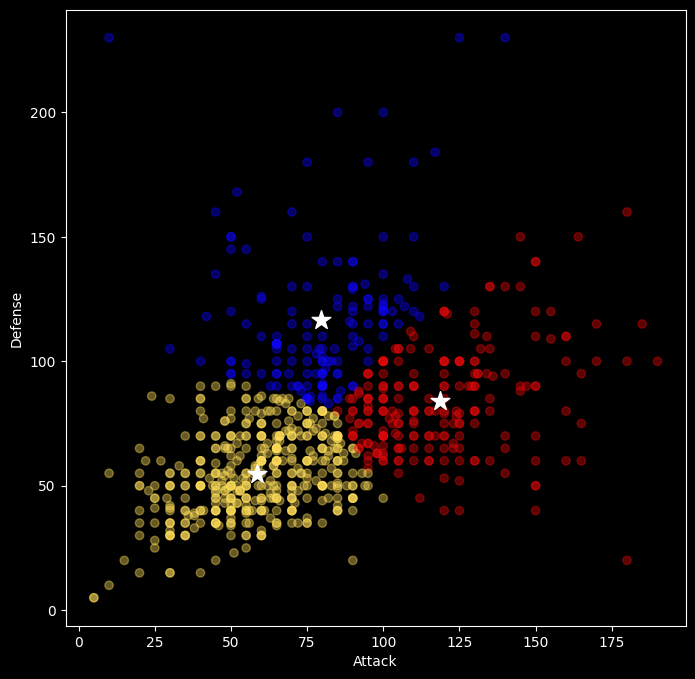

In [38]:
plt.style.use('dark_background')
plt.figure(figsize=(8,8))
plt.scatter(df2['Attack'],df2['Defense'],c=df2['clust_col'],alpha=0.4) #alpha controls transparency to see overlap 
plt.scatter(cent_x,cent_y,marker='*',s=200,c='white')
plt.xlabel('Attack')
plt.ylabel('Defense')

# Identifying the appropriate number of clusters using the elbow method 

In [45]:
dfmall = pd.read_csv("C:\\Users\\chand\\Documents\\Git Repos\\AIML-1\\StatsDatasets\\Mall_customers.txt")
print(dfmall.head())
print()
print(dfmall.shape)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

(200, 5)


In [50]:
#define the features to be clustered in a separate dataset called x 
dfmall.columns
x = dfmall[['Annual Income (k$)','Spending Score (1-100)']] #training only happens on x 
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Find the optimal number of clusters using WCSS (within-cluster sum of squares)
- measures the compactness of the cluster 
- a calculation of the total of all the squared distances between each data point and its centroid 
- The goal is to find the lowest value of WCSS, without a large number of clusters (trade-ff/balance between the two)
- the elbow method will help us find such value 

## Evaluation steps 
1. define the range of K values to evaluate (i.e. the number of clusters) `n_clusters` parameter 
2. build clusters for each K value 
3. calculate WCSS
4. plot WCSS vs K values 
5. Evaluate: find the elbow in the plot (where the line starts to flatten)

In [58]:
#build two lists: one for WCSS values and another for K values 
k_value_list = range(1,11)
wcss_list = []
list(k_value_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [59]:
for kval in k_value_list: 
    #deploy the model and fit 
    KM = KMeans(n_clusters=kval,n_init='auto', random_state=12)
    KM.fit(x)

    #calculate WCSS 
    wcss_value = KM.inertia_

    #print result report 
    print(f'K means algo with k value of:{kval} & WCSS value: {wcss_value}')
    #append info to WCSS list 
    wcss_list.append(wcss_value)





K means algo with k value of:1 & WCSS value: 269981.28
K means algo with k value of:2 & WCSS value: 184131.88502788503
K means algo with k value of:3 & WCSS value: 132162.13629759202
K means algo with k value of:4 & WCSS value: 73679.78903948836
K means algo with k value of:5 & WCSS value: 66532.5826485109
K means algo with k value of:6 & WCSS value: 59317.94171128722
K means algo with k value of:7 & WCSS value: 30227.606513152015
K means algo with k value of:8 & WCSS value: 26688.210341672842
K means algo with k value of:9 & WCSS value: 24552.293298972247
K means algo with k value of:10 & WCSS value: 22859.44226001121


Text(0, 0.5, 'WCSS Score')

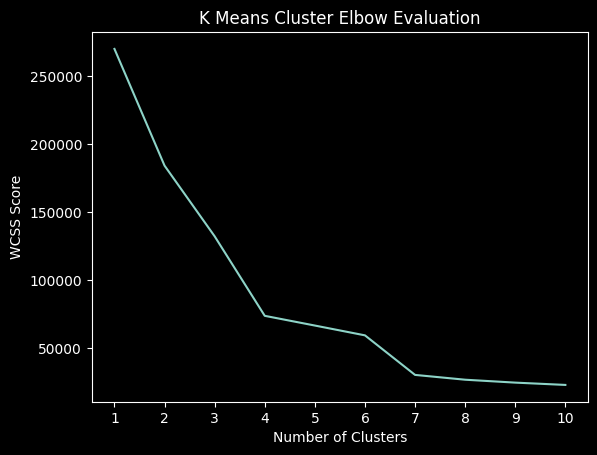

In [62]:
plt.plot(k_value_list,wcss_list)
plt.title('K Means Cluster Elbow Evaluation')
plt.xlabel("Number of Clusters")
plt.xticks(k_value_list)
plt.ylabel("WCSS Score")


In [67]:
#KM final 
km_final = KMeans(n_clusters=4,init='k-means++',random_state=12)
x['cluster'] = km_final.fit_predict(x)


C:\Users\chand\AppData\Local\Temp\ipykernel_38908\2688901377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster'] = km_final.fit_predict(x)


In [71]:
print(x.head())
print()
print(x['cluster'].unique())

   Annual Income (k$)  Spending Score (1-100)  cluster
0                  15                      39        0
1                  15                      81        1
2                  16                       6        0
3                  16                      77        1
4                  17                      40        0

[0 1 3 2]
